# Corrosion Detection 

### Detection of corrosion using Image Processing

In [654]:
import cv2
#import PIL
import matplotlib.pyplot as plt
import numpy as np
#from PIL import Image

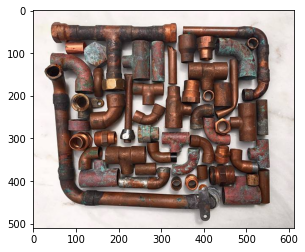

In [655]:
file_path = 'Images/img3.jpg'
img = cv2.imread(file_path)
org = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(org)

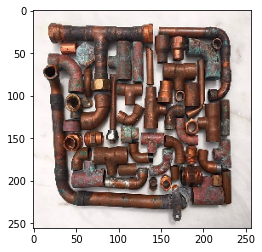

In [656]:
resized_img = cv2.resize(org, (256, 256), interpolation = cv2.INTER_NEAREST) 
plt.imshow(resized_img)

In [657]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

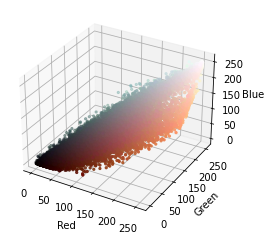

In [658]:
r, g, b = cv2.split(resized_img)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
pixel_colors = resized_img.reshape((np.shape(resized_img)[0]*np.shape(resized_img)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

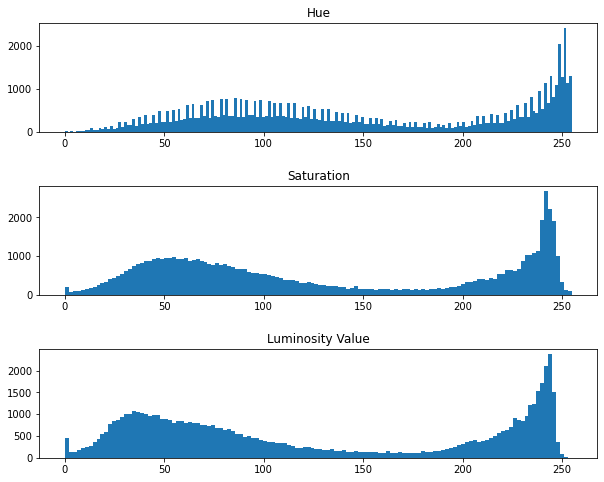

array([[241, 241, 241, ..., 230, 230, 233],
       [241, 241, 241, ..., 230, 230, 233],
       [241, 241, 241, ..., 231, 231, 233],
       ...,
       [240, 240, 240, ..., 186, 190, 191],
       [240, 240, 240, ..., 184, 187, 189],
       [239, 239, 239, ..., 181, 181, 185]], dtype=uint8)

In [659]:
from matplotlib import pyplot as plt
import cv2


resized_img2 = cv2.cvtColor(resized_img, cv2.COLOR_RGB2HSV)

H, S, V = resized_img[:,:,0],resized_img[:,:,1],resized_img[:,:,2]

plt.figure(figsize=(10,8))
plt.subplot(311)                             #plot in the first cell
plt.subplots_adjust(hspace=.5)
plt.title("Hue")
plt.hist(np.ndarray.flatten(H), bins=180)
plt.subplot(312)                             #plot in the second cell
plt.title("Saturation")
plt.hist(np.ndarray.flatten(S), bins=128)
plt.subplot(313)                             #plot in the third cell
plt.title("Luminosity Value")
plt.hist(np.ndarray.flatten(V), bins=128)
plt.show()
V

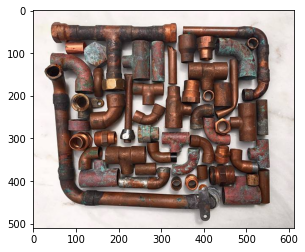

In [660]:
frame=cv2.cvtColor(resized_img, cv2.COLOR_BGR2HSV)
plt.imshow(frame)

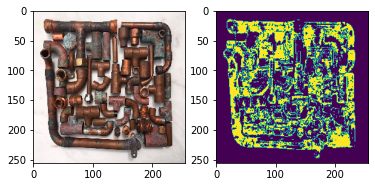

In [661]:
lower = np.array([70, 25, 25])
upper = np.array([200,140, 150])

    
mask = cv2.inRange(frame,lower, upper)
plt.subplot(121)
plt.imshow(resized_img)
plt.subplot(122)
plt.imshow(mask)

In [662]:
area = 0
contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for pic, contour in enumerate(contours): 
    area = area + cv2.contourArea(contour)
perc = (100 * area)/65536
print(perc)

45.705413818359375


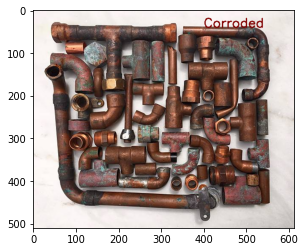

In [663]:
org2 = org
if(perc > 10):
  cv2.putText(org2, "Corroded", (400, 40),cv2.FONT_HERSHEY_SIMPLEX, 1.0, (128, 0, 0),2)  
else:
  cv2.putText(org2, "Not Corroded", (400, 40),cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 128, 0),2)
plt.imshow(org)